<a href="https://colab.research.google.com/github/adhiljuvane/Digit-classifier/blob/main/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST)
path

Path('/root/.fastai/data/mnist_png')

In [4]:
Path.BASE_PATH = path
path

Path('.')

In [14]:
(path/'training').ls()

(#10) [Path('training/1'),Path('training/4'),Path('training/9'),Path('training/3'),Path('training/7'),Path('training/2'),Path('training/5'),Path('training/8'),Path('training/0'),Path('training/6')]

In [5]:
zeroes = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

In [6]:
zeroes

(#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [7]:
im4_path = fours[1]
im4 = Image.open(im4_path)
im4

In [ ]:
tensor(im4)

In [9]:
im4_t = tensor(im4)
df = pd.DataFrame(im4_t)
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,245,232,0,0,0,60,85,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,16,245,231,0,0,0,214,254,5,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,108,254,231,0,0,53,241,254,5,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,28,246,248,71,0,20,224,254,94,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,244,246,62,0,0,214,254,165,0,0,0,0,0,0,0,0,0,0


In [10]:
zero_tensors = [tensor(Image.open(o)) for o in zeroes]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors =[tensor(Image.open(o)) for o in eights]
nine_tensors =[tensor(Image.open(o)) for o in nines]

In [11]:
len(three_tensors), len(seven_tensors), len(eight_tensors)

(6131, 6265, 5851)

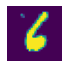

In [12]:
show_image(six_tensors[3])

In [13]:
stacked_zeroes = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

In [15]:
stacked_eights.shape

torch.Size([5851, 28, 28])

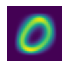

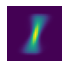

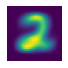

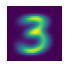

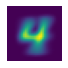

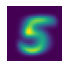

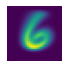

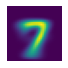

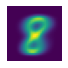

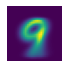

In [16]:
mean0 = stacked_zeroes.mean(0)
show_image(mean0);

mean1 = stacked_ones.mean(0)
show_image(mean1);

mean2 = stacked_twos.mean(0)
show_image(mean2);

mean3 = stacked_threes.mean(0)
show_image(mean3);

mean4 = stacked_fours.mean(0)
show_image(mean4);

mean5 = stacked_fives.mean(0)
show_image(mean5);

mean6 = stacked_sixes.mean(0)
show_image(mean6);

mean7 = stacked_sevens.mean(0)
show_image(mean7);

mean8 = stacked_eights.mean(0)
show_image(mean8);

mean9 = stacked_nines.mean(0)
show_image(mean9);

In [17]:
a_3 = stacked_threes[1]
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr
# a_3

(tensor(0.1114), tensor(0.2021))

In [18]:
valid_0_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'0').ls()]).float()/255

valid_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'1').ls()]).float()/255

valid_2_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'2').ls()]).float()/255

valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'3').ls()]).float()/255

valid_4_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'4').ls()]).float()/255

valid_5_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'5').ls()]).float()/255

valid_6_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'6').ls()]).float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'7').ls()]).float()/255

valid_8_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'8').ls()]).float()/255

valid_9_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'9').ls()]).float()/255

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [24]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [26]:
valid_0_dist = mnist_distance(valid_0_tens, mean0)
valid_1_dist = mnist_distance(valid_1_tens, mean1)
valid_2_dist = mnist_distance(valid_2_tens, mean2)
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_4_dist = mnist_distance(valid_4_tens, mean4)
valid_5_dist = mnist_distance(valid_5_tens, mean5)
valid_6_dist = mnist_distance(valid_6_tens, mean6)
valid_7_dist = mnist_distance(valid_7_tens, mean7)
valid_8_dist = mnist_distance(valid_8_tens, mean8)
valid_9_dist = mnist_distance(valid_9_tens, mean9)

valid_9_tens.shape, mean9.shape

(torch.Size([1009, 28, 28]), torch.Size([28, 28]))

In [60]:
def minim(x): 
  return min(
    mnist_distance(x,mean0).mean(0),
    mnist_distance(x,mean1).mean(0),
    mnist_distance(x,mean2).mean(0),
    mnist_distance(x,mean3).mean(0),
    mnist_distance(x,mean4).mean(0),
    mnist_distance(x,mean5).mean(0),
    mnist_distance(x,mean6).mean(0),
    mnist_distance(x,mean7).mean(0),
    mnist_distance(x,mean8).mean(0),
    mnist_distance(x,mean9).mean(0)
    )

def is_0(x): return minim(x) ==( mnist_distance(x,mean0).mean(0))
def is_1(x): return minim(x) ==( mnist_distance(x,mean1).mean(0))
def is_2(x): return minim(x) == (mnist_distance(x,mean2).mean(0))
def is_3(x): return minim(x) == (mnist_distance(x,mean3).mean(0))
def is_4(x): return minim(x) == (mnist_distance(x,mean4).mean(0))
def is_5(x): return minim(x) == (mnist_distance(x,mean5).mean(0))
def is_6(x): return minim(x) == (mnist_distance(x,mean6).mean(0))
def is_7(x): return minim(x) == (mnist_distance(x,mean7).mean(0))
def is_8(x): return minim(x) == (mnist_distance(x,mean8).mean(0))
def is_9(x): return minim(x) == (mnist_distance(x,mean9).mean(0))

In [75]:
is_4(valid_4_tens) == tensor(True)

tensor(True)

In [97]:
def predict(x):
  y = tensor(Image.open(x))
  
  if is_0(y) == tensor(True):
    return 'Zero'
  if is_1(y) == tensor(True):
    return 'One'
  if is_2(y) == tensor(True):
    return 'Two'
  if is_3(y) == tensor(True):
    return 'Three'
  if is_4(y) == tensor(True):
    return 'Four'
  if is_5(y) == tensor(True):
    return 'Five'
  if is_6(y) == tensor(True):
    return 'Six'
  if is_7(y) == tensor(True):
    return 'Seven'
  if is_8(y) == tensor(True):
    return 'Eight'
  if is_9(y) == tensor(True):
    return 'Nine'

In [99]:
predict(path/'testing'/'5'/'102.png')

'Five'